__<font size=6><font color=brown>Low back pain among medical students in Bangladesh__

<p><a href="https://www.physio-pedia.com/File:Back_pain_image.jpg#/media/File:Back_pain_image.jpg"><img src="https://www.physio-pedia.com/images/a/af/Back_pain_image.jpg" alt="Back pain image.jpg"></a><br><a href="https://www.physio-pedia.com/index.php?curid=14207">Link</a></p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url="https://raw.githubusercontent.com/royohana31/nn-project-/main/Raw%20dataset%20(2).csv"
spine_df=pd.read_csv(url,on_bad_lines='skip')
spine_df

,Educational_level,Gender,Age,Age_group,Height (m),Weight (kg),BMI,BMI_Range,Currently_LBP,LBP_6months,...,Treatments,Do_exercise,Physical_activity_Frequency,Smoking_habit,Sitting_time,Chair_type,Adjustable_back,Adjustable_sitting,Most_activity,Rest_time
0,NaN,NaN,NaN,"1 = ? 21, 2 = 22 – 24, 3 = ? 25",NaN,NaN,NaN,"1 = ? 25, 2 = > 25",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Medical interns,Male,24.0,2,1.80,90.0,27.8,2,No,Yes,...,No treatment,5 - 7 times a week,High,Smoker,< 6 hours,No back support,No,No,Sitting,Yes
2,Medical interns,Male,24.0,2,2.00,74.0,18.5,1,Yes,Yes,...,Opioid painkillers,2 - 4 times a week,Moderate,Never smoked,? 6 hours,No back support,No,Yes,Bending,Yes
3,Medical interns,Female,23.0,2,1.60,54.0,21.1,1,Yes,Yes,...,Opioid+Exercise,2 - 4 times a week,Moderate,Never smoked,< 6 hours,Have back support,No,No,Sitting,Yes
4,Medical interns,Male,24.0,2,1.80,78.0,24.1,1,Yes,Yes,...,No treatment,Once a week,Moderate,Ex-smoker,< 6 hours,Have back support,No,Yes,No task for long time,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1st year,Male,20.0,1,1.63,65.0,24.5,1,No,No,...,NaN,>7 times a week,High,Never smoked,< 6 hours,Have back support,Yes,Yes,No task for long time,Yes
204,2nd year,Female,22.0,2,1.56,57.0,23.4,1,No,No,...,Opioid painkillers,5 - 7 times a week,High,Never smoked,< 6 hours,Have back support,Yes,No,No task for long time,Yes
205,3rd year,Female,21.0,1,1.60,65.0,25.4,2,No,No,...,NaN,5 - 7 times a week,High,Never smoked,< 6 hours,Have back support,Yes,Yes,No task for long time,Yes
206,2nd year,Male,20.0,1,1.60,62.0,24.2,1,No,Yes,...,No treatment,Once a week,Moderate,Smoker,? 6 hours,No back support,No,No,Sitting,No


__lets fix it a bit__

In [4]:
spine_df=spine_df.drop(0)

In [5]:
spine_df["Educational_level"].unique()

array(['Medical interns', '1st year', '4th year', 'Final year',
       '3rd year', '2nd year'], dtype=object)

In [6]:
spine_df["Educational_level"].replace({"Final year":"last_year",'4th year':"last_year",'Medical interns':"intenrns"},inplace=True)

In [7]:
spine_df["Educational_level"].value_counts()

Educational_level
last_year    75
intenrns     40
1st year     31
2nd year     31
3rd year     30
Name: count, dtype: int64

In [9]:
spine_df["Sitting_time"].replace({'< 6 hours':"less_than_6",'? 6 hours':"above_6"},inplace=True)

In [10]:
spine_df["Sitting_time"].unique()

array(['less_than_6', 'above_6'], dtype=object)

In [11]:
spine_df.rename(columns={"Height (m)":"Height"},inplace=True)

In [12]:
spine_df["Educational_level"].unique()

array(['intenrns', '1st year', 'last_year', '3rd year', '2nd year'],
      dtype=object)

In [13]:
spine_df.drop(columns=["Age_group","BMI",])

,Educational_level,Gender,Age,Height,Weight (kg),BMI_Range,Currently_LBP,LBP_6months,LBP_12months,LBP_first_time,...,Treatments,Do_exercise,Physical_activity_Frequency,Smoking_habit,Sitting_time,Chair_type,Adjustable_back,Adjustable_sitting,Most_activity,Rest_time
1,intenrns,Male,24.0,1.80,90.0,2,No,Yes,Yes,Medical,...,No treatment,5 - 7 times a week,High,Smoker,less_than_6,No back support,No,No,Sitting,Yes
2,intenrns,Male,24.0,2.00,74.0,1,Yes,Yes,Yes,Medical,...,Opioid painkillers,2 - 4 times a week,Moderate,Never smoked,above_6,No back support,No,Yes,Bending,Yes
3,intenrns,Female,23.0,1.60,54.0,1,Yes,Yes,Yes,Medical,...,Opioid+Exercise,2 - 4 times a week,Moderate,Never smoked,less_than_6,Have back support,No,No,Sitting,Yes
4,intenrns,Male,24.0,1.80,78.0,1,Yes,Yes,Yes,Medical,...,No treatment,Once a week,Moderate,Ex-smoker,less_than_6,Have back support,No,Yes,No task for long time,Yes
5,intenrns,Female,24.0,1.60,50.0,1,Yes,Yes,Yes,Internship,...,Opioid painkillers,Rarely,Low,Never smoked,less_than_6,No back support,No,No,Standing or walking,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1st year,Male,20.0,1.63,65.0,1,No,No,No,NaN,...,NaN,>7 times a week,High,Never smoked,less_than_6,Have back support,Yes,Yes,No task for long time,Yes
204,2nd year,Female,22.0,1.56,57.0,1,No,No,No,Medical,...,Opioid painkillers,5 - 7 times a week,High,Never smoked,less_than_6,Have back support,Yes,No,No task for long time,Yes
205,3rd year,Female,21.0,1.60,65.0,2,No,No,No,NaN,...,NaN,5 - 7 times a week,High,Never smoked,less_than_6,Have back support,Yes,Yes,No task for long time,Yes
206,2nd year,Male,20.0,1.60,62.0,1,No,Yes,Yes,Medical,...,No treatment,Once a week,Moderate,Smoker,above_6,No back support,No,No,Sitting,No


In [14]:
spine_df['LBP_first_time'].fillna("unreported", inplace=True)
spine_df['Duration_in_12_months'].fillna("unreported", inplace=True)
spine_df['LBP_episodes'].fillna("unreported", inplace=True)
spine_df['Causes'].fillna("unreported", inplace=True)
spine_df['Aggravating_factors'].fillna("unreported", inplace=True)
spine_df['Leg_pain'].fillna("unreported", inplace=True)
spine_df['Treatments'].fillna("unreported", inplace=True)
spine_df.isnull().sum()

Educational_level              0
Gender                         0
Age                            0
Age_group                      0
Height                         0
Weight (kg)                    0
BMI                            0
BMI_Range                      0
Currently_LBP                  0
LBP_6months                    0
LBP_12months                   0
LBP_first_time                 0
Duration_in_12_months          0
LBP_episodes                   0
Causes                         0
Aggravating_factors            0
Leg_pain                       0
Treatments                     0
Do_exercise                    0
Physical_activity_Frequency    0
Smoking_habit                  0
Sitting_time                   0
Chair_type                     0
Adjustable_back                0
Adjustable_sitting             0
Most_activity                  0
Rest_time                      0
dtype: int64

In [15]:
spine_df.dtypes

Educational_level               object
Gender                          object
Age                            float64
Age_group                       object
Height                         float64
Weight (kg)                    float64
BMI                            float64
BMI_Range                       object
Currently_LBP                   object
LBP_6months                     object
LBP_12months                    object
LBP_first_time                  object
Duration_in_12_months           object
LBP_episodes                    object
Causes                          object
Aggravating_factors             object
Leg_pain                        object
Treatments                      object
Do_exercise                     object
Physical_activity_Frequency     object
Smoking_habit                   object
Sitting_time                    object
Chair_type                      object
Adjustable_back                 object
Adjustable_sitting              object
Most_activity            

dummies for correlation check

In [16]:
dummies=pd.get_dummies(spine_df,columns=["LBP_12months",'BMI_Range','Educational_level','Physical_activity_Frequency','Gender','Rest_time','Most_activity','Leg_pain','Currently_LBP','Duration_in_12_months','Chair_type','Adjustable_sitting','LBP_episodes','Sitting_time','Smoking_habit','Do_exercise','Aggravating_factors','LBP_first_time'])
dummies.columns

Index(['Age', 'Age_group', 'Height', 'Weight (kg)', 'BMI', 'LBP_6months',
       'Causes', 'Treatments', 'Adjustable_back', 'LBP_12months_No',
       'LBP_12months_Yes', 'BMI_Range_1', 'BMI_Range_2',
       'Educational_level_1st year', 'Educational_level_2nd year',
       'Educational_level_3rd year', 'Educational_level_intenrns',
       'Educational_level_last_year', 'Physical_activity_Frequency_High',
       'Physical_activity_Frequency_Low',
       'Physical_activity_Frequency_Moderate', 'Gender_Female', 'Gender_Male',
       'Rest_time_No', 'Rest_time_Yes', 'Most_activity_Bending',
       'Most_activity_No task for long time', 'Most_activity_Sitting',
       'Most_activity_Standing or walking', 'Leg_pain_No', 'Leg_pain_Not sure',
       'Leg_pain_Yes', 'Leg_pain_unreported', 'Currently_LBP_No',
       'Currently_LBP_Yes', 'Duration_in_12_months_1',
       'Duration_in_12_months_2', 'Duration_in_12_months_3',
       'Duration_in_12_months_4', 'Duration_in_12_months_unreported',
   

תחילת מסקנה א-קשר בין מאפיינים גנטיים וביולוגיים וממשיים לכאב

<font size=5>__conclusion 1:The connection between genetics and biology on LBP among the students__

<Axes: >

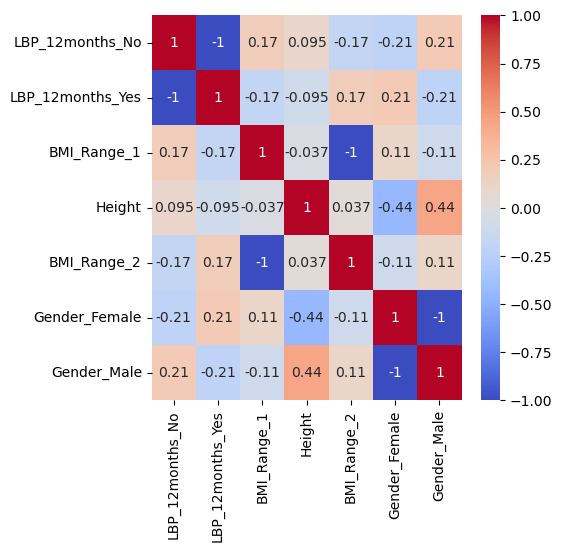

In [17]:
selected=dummies[['LBP_12months_No','LBP_12months_Yes',
       'BMI_Range_1',"Height", 'BMI_Range_2', 'Gender_Female', 'Gender_Male']]
corr_matrix=selected.corr(method="kendall")
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot = True)


<font size=3>we can understand there is a connenction about being a female and have LBP and about BMI of group 2 and suffer from LBP,lets check it

<set style>__Gender and LBP__

In [18]:
spine_df["Gender"].value_counts()

Gender
Female    115
Male       92
Name: count, dtype: int64

In [102]:
spine_df.groupby(["Gender"])['LBP_12months'].value_counts().reset_index()

,Gender,LBP_12months,count
0,Female,Yes,83
1,Female,No,32
2,Male,Yes,48
3,Male,No,44


connection between gender and LBP

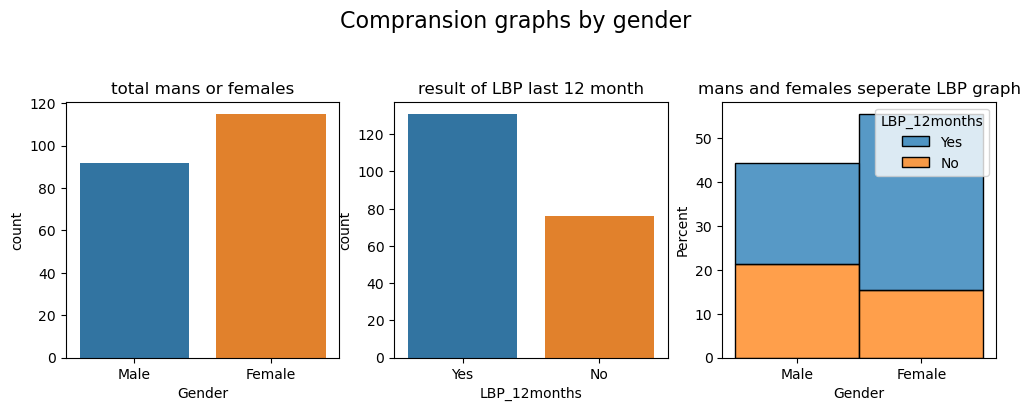

In [116]:
fig, ax = plt.subplots(1,3,figsize=(12, 4))
sns.countplot(data=spine_df,x='LBP_12months',ax=ax[1])
ax[1].set_title("result of LBP last 12 month")
sns.countplot(data=spine_df,x="Gender",ax=ax[0])
ax[0].set_title("total mans or females")
counts = spine_df.groupby("Gender")['LBP_12months'].value_counts().reset_index()
sns.histplot(data=spine_df, x="Gender", hue="LBP_12months",ax=ax[2],multiple="stack",stat="percent")
ax[2].set_title("mans and females seperate LBP graph")
fig.suptitle('Compransion graphs by gender',size=16)
plt.subplots_adjust(top=0.75)





<font size=4>__subconclusion:more females suffer relatively from LBP among the students.__


<font size=5>__height and spine pain__

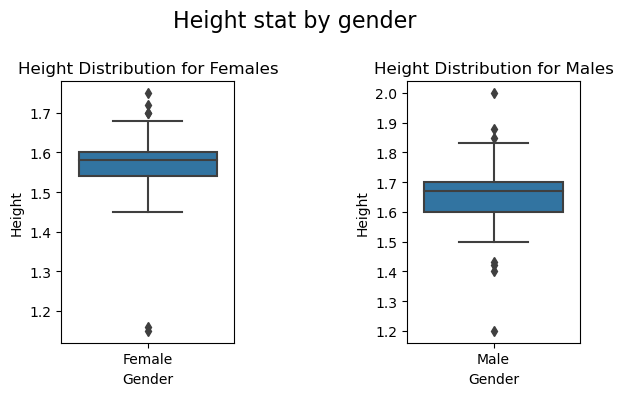

In [120]:
females=spine_df[spine_df["Gender"]=="Female"]
males=spine_df[spine_df["Gender"]=="Male"]
fig, ax = plt.subplots(1,2,figsize=(6, 4))
sns.boxplot(data=males,x='Gender',y="Height",ax=ax[1])
sns.boxplot(data=females,x='Gender',y="Height",ax=ax[0])
ax[0].set_title('Height Distribution for Females')
ax[1].set_title('Height Distribution for Males')
plt.tight_layout()
plt.subplots_adjust(wspace=1)
fig.suptitle('Height stat by gender',size=16)
plt.subplots_adjust(top=0.8)





Text(0.5, 0.98, 'height distribution by gender among students')

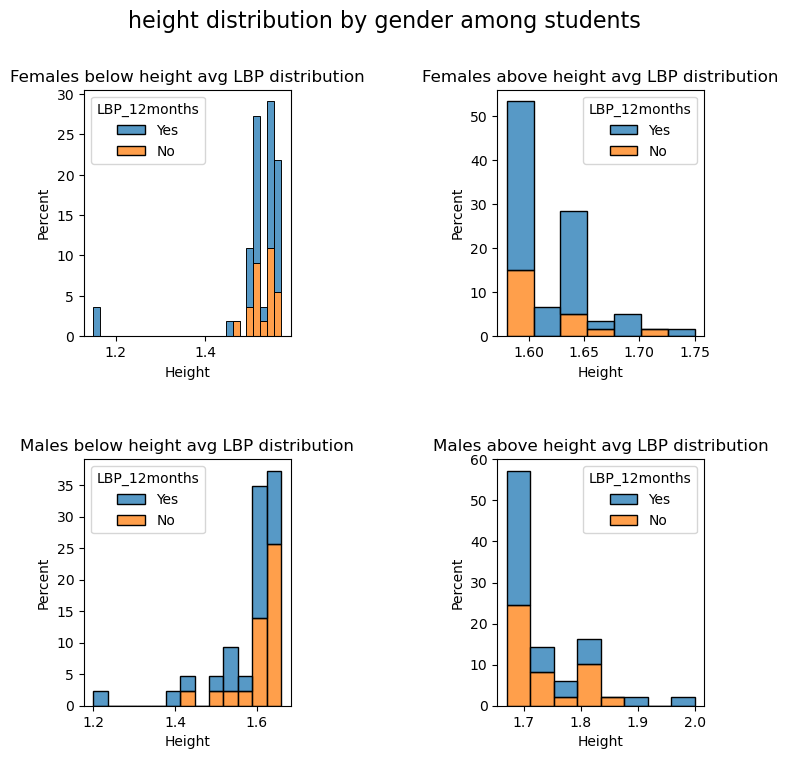

In [121]:
waboveavg=spine_df[(spine_df["Gender"]=="Female")&(spine_df["Height"]>=1.572)]
wbelowavg=spine_df[(spine_df["Gender"]=="Female")&(spine_df["Height"]<1.572)]
maboveavg=spine_df[(spine_df["Gender"]=="Male")&(spine_df["Height"]>=1.662)]
mbelowavg=spine_df[(spine_df["Gender"]=="Male")&(spine_df["Height"]<1.662)]
fig, ax = plt.subplots(2,2,figsize=(8, 8))
sns.histplot(data=waboveavg,x="Height",hue='LBP_12months',multiple="stack",stat="percent",ax=ax[0,1])
ax[0,0].set_title("Females below height avg LBP distribution")
sns.histplot(data=wbelowavg,x="Height",hue='LBP_12months',multiple="stack",stat="percent",ax=ax[0,0])
ax[0,1].set_title("Females above height avg LBP distribution")
sns.histplot(data=maboveavg,x="Height",hue='LBP_12months',multiple="stack",stat="percent",ax=ax[1,1])
ax[1,0].set_title("Males below height avg LBP distribution")
ax[1,1].set_title("Males above height avg LBP distribution")
sns.histplot(data=mbelowavg,x="Height",hue='LBP_12months',multiple="stack",stat="percent",ax=ax[1,0])
plt.subplots_adjust(wspace=1,hspace=0.5)
fig.suptitle('height distribution by gender among students', fontsize=16)








<font size=4,font color=blue>__ we cant see any dramatic change(low of data),Sub conclusion:height we assume that height has no effect on students LBP in the medical school.__

<font size=5>BMI "range" "and" spine pain  

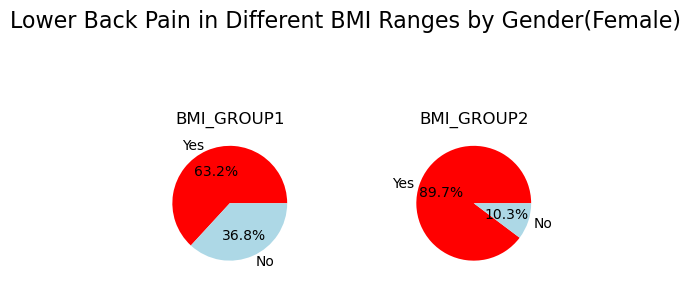

In [122]:

FBMI1=spine_df[(spine_df['Gender']=="Female")&(spine_df['BMI_Range']=='1')]
size1=FBMI1['LBP_12months'].value_counts()
FBMI2=spine_df[(spine_df['Gender']=="Female")&(spine_df['BMI_Range']=='2')]
size2=FBMI2['LBP_12months'].value_counts()

fig, ax = plt.subplots(1,2,figsize=(5, 4))
ax[0].pie(size1, labels=FBMI1['LBP_12months'].unique(), autopct='%1.1f%%',colors=["red","lightblue"] )
ax[0].set_title("BMI_GROUP1")
ax[1].pie(size2, labels=FBMI1['LBP_12months'].unique(), autopct='%1.1f%%',colors=["red","lightblue"] )
ax[1].set_title("BMI_GROUP2")
fig.suptitle('Lower Back Pain in Different BMI Ranges by Gender(Female)', fontsize=16)

plt.subplots_adjust(wspace=0.7)








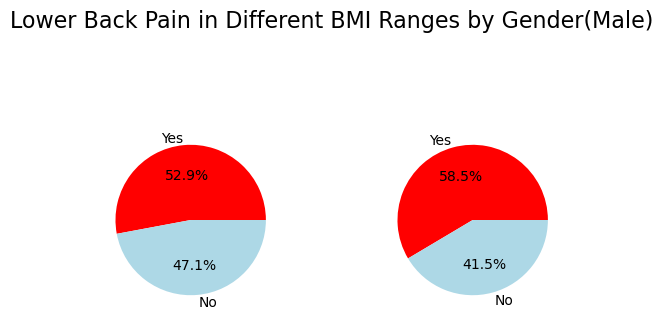

In [25]:
MBMI1=spine_df[(spine_df['Gender']=="Male")&(spine_df['BMI_Range']=='1')]
size3=MBMI1['LBP_12months'].value_counts()
MBMI2=spine_df[(spine_df['Gender']=="Male")&(spine_df['BMI_Range']=='2')]
size4=MBMI2['LBP_12months'].value_counts()
fig, ax = plt.subplots(1,2,figsize=(5, 4))
fig.suptitle('Lower Back Pain in Different BMI Ranges by Gender(Male)', fontsize=16)

ax[0].pie(size3, labels=FBMI1['LBP_12months'].unique(), autopct='%1.1f%%',colors=["red","lightblue"] )
ax[1].pie(size4, labels=FBMI2['LBP_12months'].unique(), autopct='%1.1f%%',colors=["red","lightblue"] )
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)



<font size=4>__sub-conclusion__:____The"BMI_Range" has a big impact on Females students and normal impact among the Males students__

<font size=5,font color=blue>__main conclusion1 :height dont have impact on the disrubution of LBP but,high\low BMI and surely among females students their posiibility to suffer from LBP is much higher__

 <font size=6>__Conclusion 2:Does lifestyle effect the students LBP?__

Text(0.5, 1.0, 'students without perfect chair')

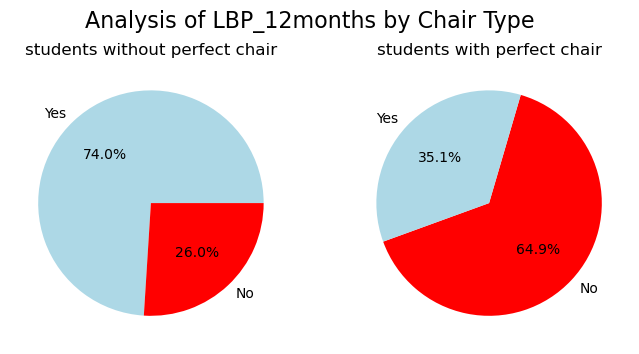

In [131]:
spine_df["perfect_chair"] = (
    (spine_df["Chair_type"] == "Have back support") &
    (spine_df["Adjustable_back"] == "Yes") &
    (spine_df["Adjustable_sitting"] == "Yes")
).apply(lambda x: "yes" if x else "no")

counts1=spine_df[spine_df["perfect_chair"]=='yes'].groupby("perfect_chair")["LBP_12months"].value_counts().reset_index()
counts2=spine_df[spine_df["perfect_chair"]=='no'].groupby("perfect_chair")["LBP_12months"].value_counts().reset_index()
counts1
counts2
fig, ax = plt.subplots(1,2,figsize=(8, 4))
fig.suptitle('Analysis of LBP_12months by Chair Type', fontsize=16)
ax[1].pie(counts1["count"], labels=counts1["LBP_12months"].unique(), autopct='%1.1f%%',colors=["red","lightblue"],startangle=200 )
ax[1].set_title("students with perfect chair")
ax[0].pie(counts2["count"], labels=counts2["LBP_12months"].unique(), autopct='%1.1f%%',colors=["lightblue","red"] )
ax[0].set_title("students without perfect chair")




<font size=3>__sub-conclusion:we can understand that student with "perfect chair" are less common to have LBP__


In [29]:
spine_df["Physical_activity_Frequency"].unique()
spine_df.groupby("Do_exercise")['Physical_activity_Frequency'].value_counts()

Do_exercise         Physical_activity_Frequency
2 - 4 times a week  Moderate                       45
5 - 7 times a week  High                           28
>7 times a week     High                           16
Never               Low                            20
Once a week         Moderate                       24
Rarely              Low                            74
Name: count, dtype: int64

In [30]:
conditions = [
    (spine_df["Do_exercise"] == '>7 times a week') & (spine_df['Physical_activity_Frequency'] == "High"),
    (spine_df["Do_exercise"] == '5 - 7 times a week') & (spine_df['Physical_activity_Frequency'] == "High"),
    (spine_df["Do_exercise"] == '2 - 4 times a week') & (spine_df['Physical_activity_Frequency'] == "Moderate"),
    (spine_df["Do_exercise"] == 'Never ') & (spine_df['Physical_activity_Frequency'] == "Low"),
    (spine_df["Do_exercise"] == 'Once a week') & (spine_df['Physical_activity_Frequency'] == "Moderate"),
    (spine_df["Do_exercise"] == 'Rarely') & (spine_df['Physical_activity_Frequency'] == "Low")
]
choices=['extremely_active','very_active','active','inactive','moderately_active','inactive']
spine_df["activness_level"] = np.select(conditions, choices,default="Unknown")



<Axes: >

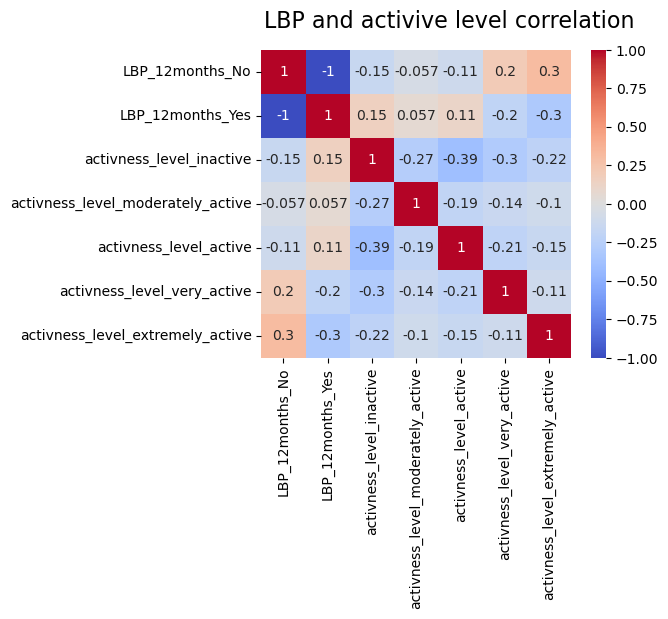

In [132]:
newdummi=pd.get_dummies(spine_df,columns=["activness_level","LBP_12months"])
newdummi.columns
interest=['LBP_12months_No', 'LBP_12months_Yes','activness_level_inactive',
       'activness_level_moderately_active', 'activness_level_active',
       'activness_level_very_active','activness_level_extremely_active']
matrix=newdummi[interest].corr()
fig, ax = plt.subplots(figsize=(5, 4))
fig.suptitle('LBP and activive level correlation', fontsize=16)

sns.heatmap(matrix, cmap='coolwarm', center=0, annot = True)

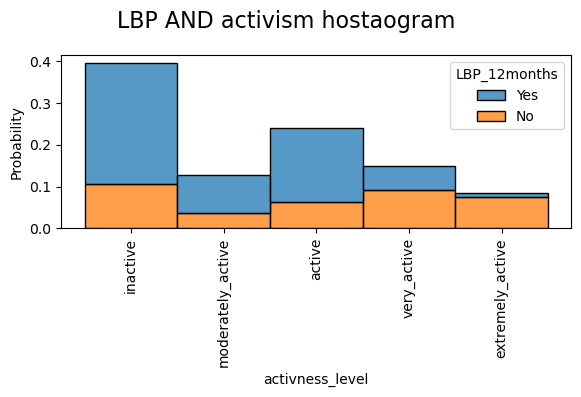

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [33]:
spine_df['activness_level']
order1=['inactive','moderately_active','active','very_active','extremely_active']
spine_df['activness_level'].value_counts()
spine_df['activness_level'] = pd.Categorical(spine_df['activness_level'], categories=order1, ordered=True)
fig, ax = plt.subplots(figsize=(6, 4))
fig.suptitle('LBP AND activism hostaogram', fontsize=16)
sns.histplot(data=spine_df, x='activness_level', hue='LBP_12months', stat='probability', multiple='stack',)
plt.xticks( rotation=90)  
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 5))



<font size=3>__from the heatmap and the histogram we understand that students who are more active apperantly decrease the chances to suffer from LBP__

<font size=5>__Smoking and LBP__

In [34]:
spine_df['Smoking_habit'].unique()

array(['Smoker', 'Never smoked', 'Ex-smoker'], dtype=object)

Text(0.5, 0.98, 'LBP and smoking connection')

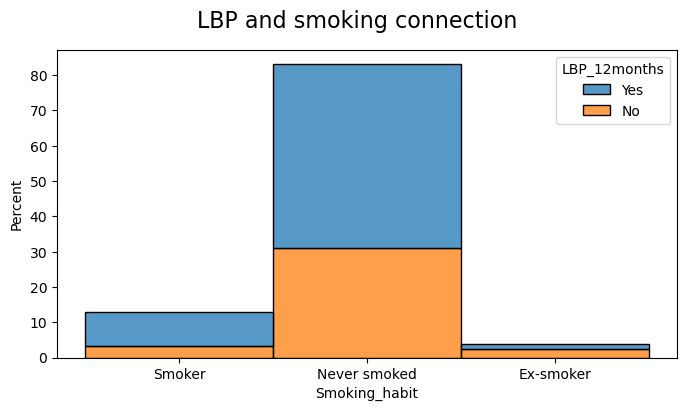

In [35]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data=spine_df,x='Smoking_habit',hue='LBP_12months',stat="percent",multiple="stack")
fig.suptitle('LBP and smoking connection', fontsize=16)



<font size=3> __smoking isnt increase chances for LBP among the students!!!__

<font size=5>__Variety of students Treatments and the effection on LBP__

In [36]:
spine_df['Treatments'].value_counts().reset_index()

,Treatments,count
0,No treatment,93
1,unreported,53
2,Opioid painkillers,34
3,Exercise therapy,14
4,Opioid+Exercise,8
5,Opioid+injection,3
6,Steroid injections,2


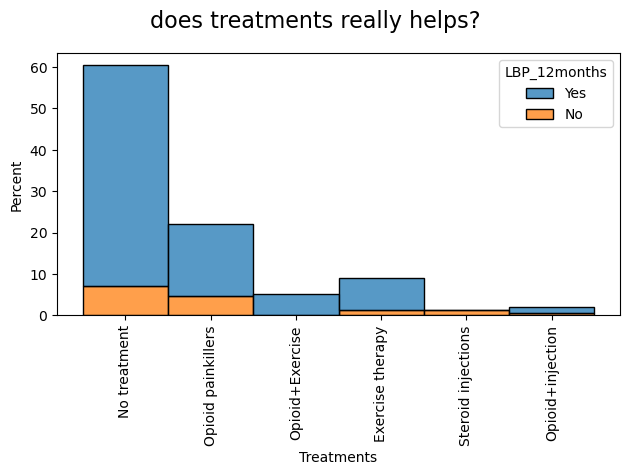

In [37]:
filtered=spine_df[spine_df['Treatments']!="unreported"]
sns.histplot(data=filtered,x='Treatments',hue='LBP_12months',multiple='stack',stat="percent")
plt.suptitle('does treatments really helps?', fontsize=16)
plt.xticks( rotation=90)  
plt.tight_layout()
plt.show()


<font size=4>__from the graph we can see that there isnt affection for The variety of treatments__
<font size=4>__but we can see that "No treatment students" are likely to suffer from LBP__

<font size=4>filtering for "No treatment" students

In [38]:
filtered=spine_df[spine_df['Treatments']=="No treatment"]
filtered.shape

(93, 29)

<font size=5>__The "No treatment" students__

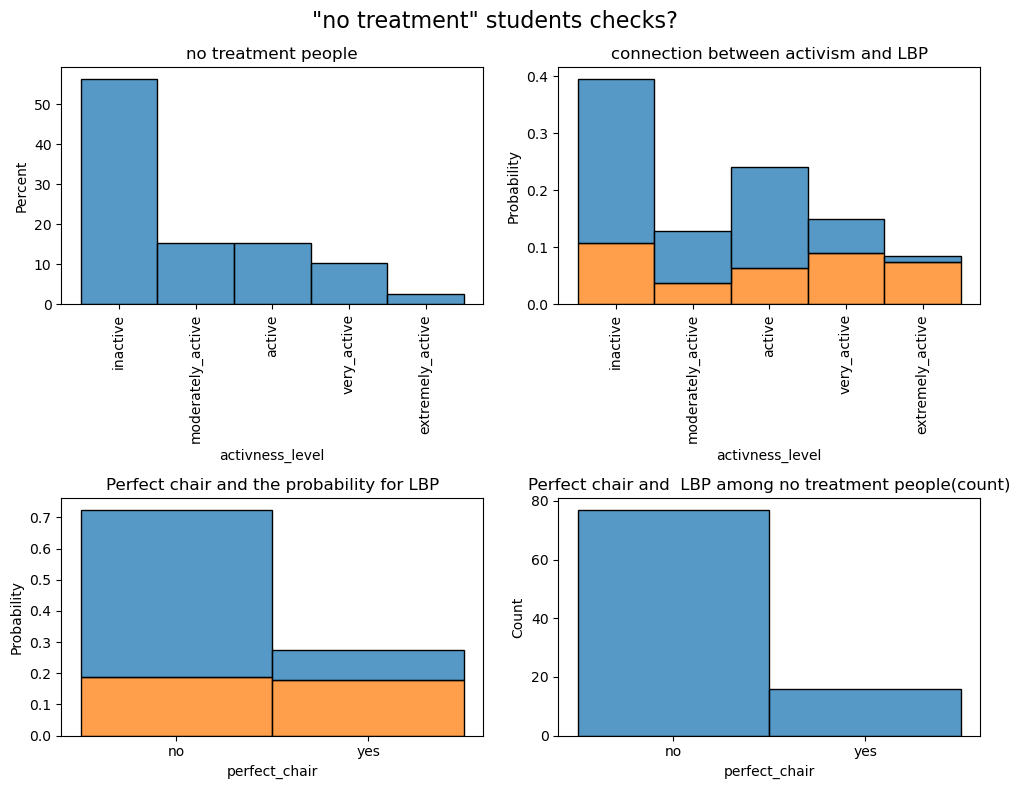

In [39]:
fig, ax = plt.subplots(2,2,figsize=(10, 8))
sns.histplot(data=filtered, x='activness_level',stat='percent',ax=ax[0,0])
ax[0, 0].tick_params(axis='x', rotation=90)
ax[0, 1].tick_params(axis='x', rotation=90)
sns.histplot(data=spine_df, x='activness_level', hue='LBP_12months', stat='probability', multiple='stack',ax=ax[0,1])
sns.histplot(data=spine_df,x='perfect_chair',hue='LBP_12months',stat='probability',multiple='stack',ax=ax[1,0])
sns.histplot(data=filtered, x='perfect_chair', stat='count', multiple='stack',ax=ax[1,1])
ax[0, 1].legend_.remove()
ax[1, 0].legend_.remove()
ax[0,0].set_title("no treatment people")
ax[0,1].set_title("connection between activism and LBP")
ax[1,0].set_title("Perfect chair and the probability for LBP")
ax[1,1].set_title("Perfect chair and  LBP among no treatment people(count)")
fig.suptitle('"no treatment" students checks?', fontsize=16)

plt.tight_layout()




<font size=4>__does seating effect LBP__?

In [40]:
spine_df.columns

Index(['Educational_level', 'Gender', 'Age', 'Age_group', 'Height',
       'Weight (kg)', 'BMI', 'BMI_Range', 'Currently_LBP', 'LBP_6months',
       'LBP_12months', 'LBP_first_time', 'Duration_in_12_months',
       'LBP_episodes', 'Causes', 'Aggravating_factors', 'Leg_pain',
       'Treatments', 'Do_exercise', 'Physical_activity_Frequency',
       'Smoking_habit', 'Sitting_time', 'Chair_type', 'Adjustable_back',
       'Adjustable_sitting', 'Most_activity', 'Rest_time', 'perfect_chair',
       'activness_level'],
      dtype='object')

<Axes: >

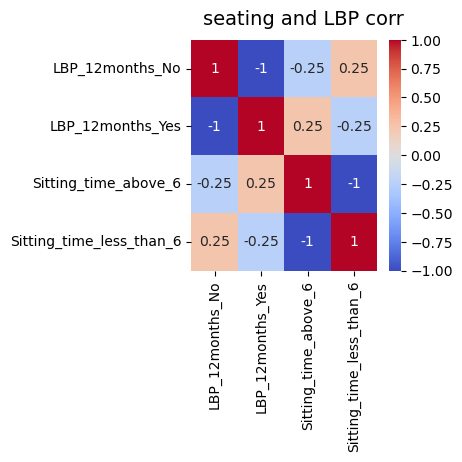

In [41]:
newdummi2=pd.get_dummies(spine_df,columns=['Sitting_time',"LBP_12months"])
newdummi2.columns
interest2=['LBP_12months_No','LBP_12months_Yes','Sitting_time_above_6','Sitting_time_less_than_6']
matrix2=newdummi2[interest2].corr()
fig, ax = plt.subplots(figsize=(3, 3))
fig.suptitle('seating and LBP corr', fontsize=14)

sns.heatmap(matrix2, cmap='coolwarm', center=0, annot = True)


<font size=5>__we can see direct connection between seating time and LBP SO WE WILL CHECK IT__

<Axes: xlabel='Sitting_time', ylabel='Probability'>

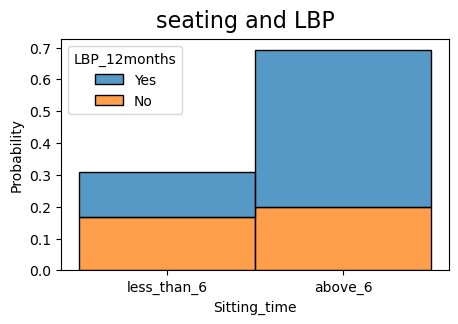

In [133]:
fig, ax = plt.subplots(figsize=(5, 3))
fig.suptitle('seating and LBP ', fontsize=16)

sns.histplot(data=spine_df,x='Sitting_time',hue='LBP_12months',multiple="stack",stat="probability")

<font size=4>__Direct connection__!!!

Text(0.5, 0.98, '"no treatment" students')

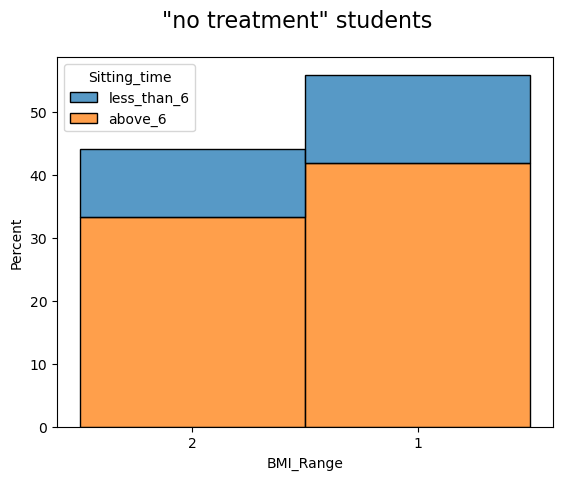

In [43]:
slicing=spine_df[spine_df["Treatments"]=="No treatment"]
order=slicing.groupby('BMI_Range')['Sitting_time'].value_counts().reset_index()
order
sns.histplot(slicing,x='BMI_Range',hue='Sitting_time',multiple="stack",stat="percent")
plt.suptitle('"no treatment" students' , fontsize=16)


extras

<font size=5>from the two compransion graphs we can understand that the "No treatment",students are also less active and dont sit on "Perfect chairs" more than it most of them seats above 6 hours a day,so there lifestyle is incomplete and surely they have better chances to suffer from LBP
    

<FONT SIZE=6>Main Conclusion 2:Smoking and Treatmens arent affect the chances to avoid LBP but lifestyile  IS main reason to "fight" the chances for pain 

<font size=5,style color=BLUE>__Conclusion number 3:there is a connection between the students year and the chances to suffer from LBP__?
    
   
    
    

<Axes: >

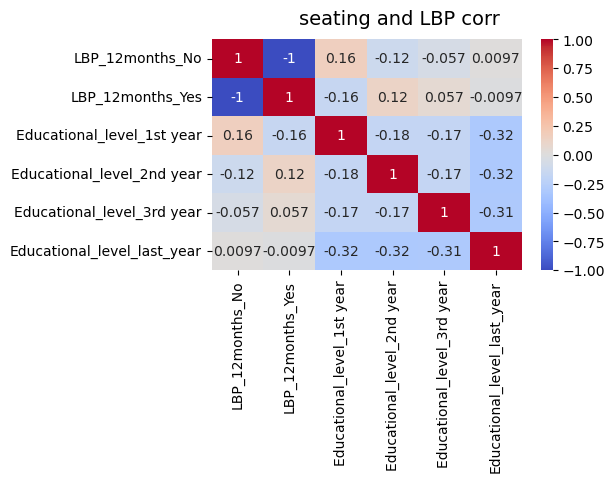

In [60]:
newdummi3=pd.get_dummies(spine_df,columns=['Educational_level',"LBP_12months"])
newdummi3.columns
interest2=['LBP_12months_No','LBP_12months_Yes','Educational_level_1st year', 'Educational_level_2nd year',
       'Educational_level_3rd year','Educational_level_last_year']
matrix3=newdummi3[interest2].corr()
fig, ax = plt.subplots(figsize=(5, 3))
fig.suptitle('seating and LBP corr', fontsize=14)

sns.heatmap(matrix3, cmap='coolwarm', center=0, annot = True)


In [45]:
styear1=spine_df[spine_df["Educational_level"]=="1st year"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()
styear2=spine_df[spine_df["Educational_level"]=="2nd year"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()
styear3=spine_df[spine_df["Educational_level"]=="3rd year"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()
styearfinal=spine_df[spine_df["Educational_level"]=="last_year"].groupby("Educational_level")["LBP_12months"].value_counts().reset_index()



Text(0.5, 0.98, 'distribution of students by year')

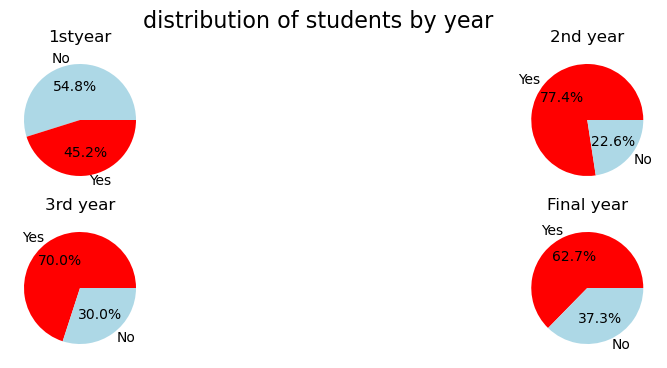

In [46]:
fig, ax = plt.subplots(2,2,figsize=(12, 4))
ax[0,0].pie(styear1["count"], labels=styear1["LBP_12months"].values, autopct='%1.1f%%',colors=["lightblue","red"] ) 
ax[0,0].set_title("1styear")
ax[0,1].pie(styear2["count"], labels=styear2["LBP_12months"].values, autopct='%1.1f%%',colors=["red","lightblue"] )  
ax[0,1].set_title("2nd year")
ax[1,0].pie(styear3["count"], labels=styear2["LBP_12months"].values, autopct='%1.1f%%', colors=["red","lightblue"] ) 
ax[1,0].set_title("3rd year")
ax[1,1].pie(styearfinal["count"], labels=styear2["LBP_12months"].values, autopct='%1.1f%%',colors=["red","lightblue"] )
ax[1,1].set_title("Final year")
fig.suptitle('distribution of students by year' , fontsize=16)






<font size=3>__we can see that the first year students are less likely to suffer,lets check it by 5 categories that we have founded affectable:"Perfect chair,seatingtime,activism,gender and we will check if they had some kind of treatments__.

Text(0.5, 0.98, 'distribution of students by year-does they have a perfect chair?')

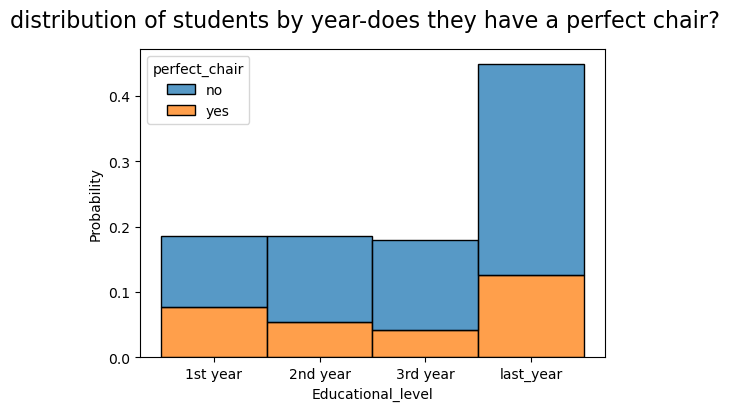

In [70]:
order=["1st year","2nd year","3rd year",'last_year']

spine_df['Educational_level'] = pd.Categorical(spine_df['Educational_level'], categories=order)
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=spine_df,x="Educational_level",hue="perfect_chair",stat='probability',multiple="stack",)
fig.suptitle('distribution of students by year-does they have a perfect chair?' , fontsize=16)



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


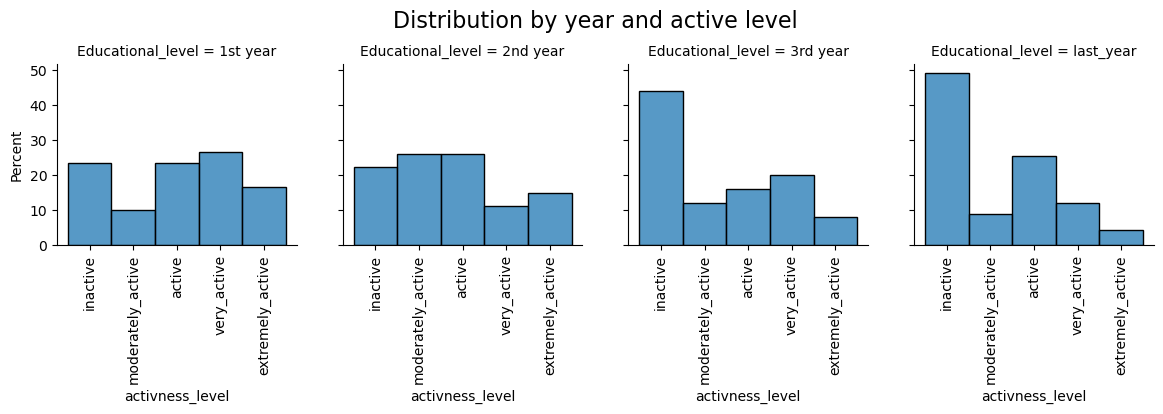

In [101]:
order=["1st year","2nd year","3rd year",'last_year']
g = sns.FacetGrid(spine_df, col='Educational_level',col_order=order)
g.map_dataframe(sns.histplot, x='activness_level',multiple="stack",stat="percent")
g.fig.suptitle('Distribution by year and active level', fontsize=16)
plt.subplots_adjust(top=0.8)  


g.set_xticklabels(rotation=90)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


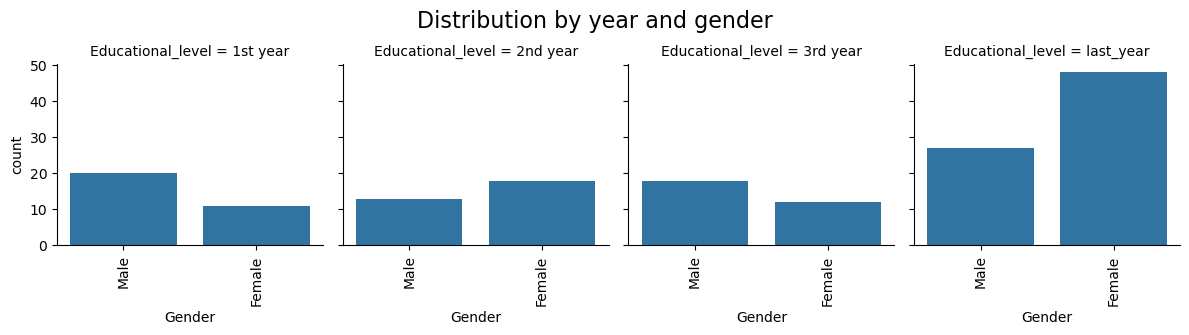

In [99]:
order=["1st year","2nd year","3rd year",'last_year']

g = sns.FacetGrid(spine_df, col='Educational_level',col_order=order)
g.map_dataframe(sns.countplot, x="Gender")
plt.subplots_adjust(top=0.8)  
g.fig.suptitle('Distribution by year and gender', fontsize=16)

g.set_xticklabels(rotation=90)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


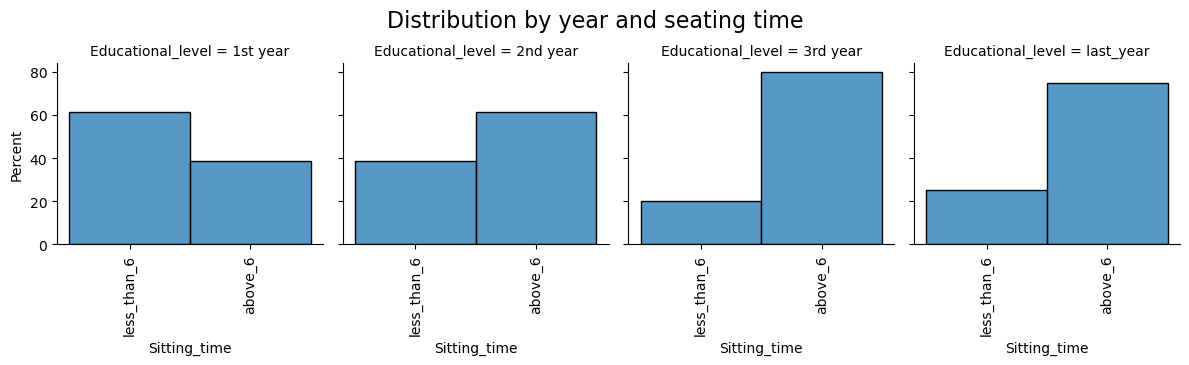

In [96]:
g = sns.FacetGrid(spine_df, col='Educational_level',col_order=order)
g.map_dataframe(sns.histplot, x="Sitting_time",stat="percent")
g.fig.suptitle('Distribution by year and seating time', fontsize=16)
plt.subplots_adjust(top=0.8) 
g.set_xticklabels(rotation=90)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


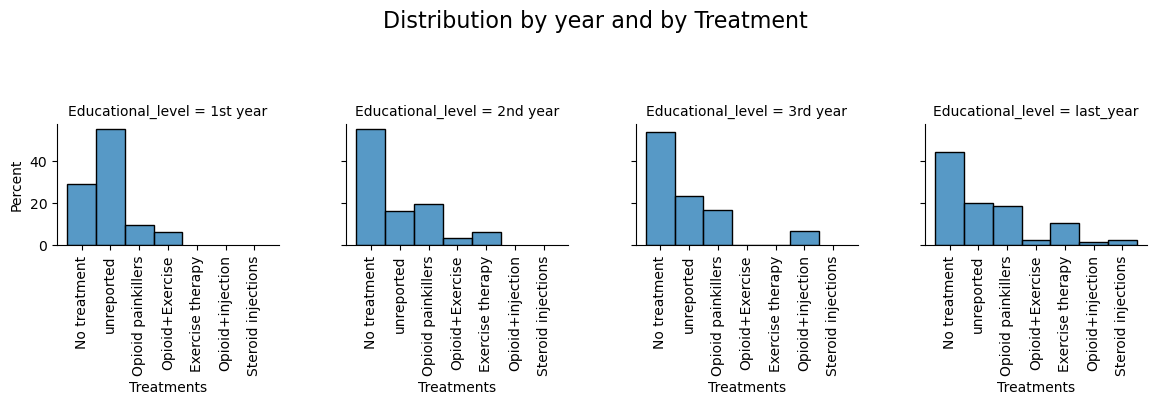

In [89]:
order=["1st year","2nd year","3rd year",'last_year']
g = sns.FacetGrid(spine_df, col='Educational_level',col_order=order)
fig.suptitle('distribution by treatment' , fontsize=16)

g.map_dataframe(sns.histplot, x='Treatments',multiple="stack",stat="percent")
g.set_xticklabels(rotation=90)
g.fig.suptitle('Distribution by year and by Treatment', fontsize=16)
plt.subplots_adjust(top=0.6)  



<font size=5,font color=blue>__main conclusion number 3: as we saw the first year students are the less likely to belong to the 'no treat,emt group',they are the most active compared to the others groups,60 % of them seats less then 6 hours a day and most of them are males which we have found that they are less likely to suffer, if we combined all the data toghether thats can explain why the first year students is the group with the least students who suffer from LBP__